# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys1 import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #Pretty print the JSON request pull to see the formatted lists/dictionaries
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | lata
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | hammerfest
Processing Record 6 of Set 1 | ivdel'
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | badger
Processing Record 14 of Set 1 | madhogarh
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | ouadda
Processing Record 17 of Set 1 | xining
Processing Record 18 of Set 1 | port shepstone
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | zabol
Processing Record 21 of Set 1 | selfoss
Processing Record 22 of Set 1 | port e

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,294.12,95,23,2.79,ZA,1706913570
1,waitangi,-43.9535,-176.5597,287.49,95,100,1.79,NZ,1706913701
2,lata,40.1629,-8.3327,283.66,84,35,1.65,PT,1706913702
3,yellowknife,62.4560,-114.3525,262.75,95,100,2.57,CA,1706913702
4,hammerfest,70.6634,23.6821,265.40,93,0,0.51,NO,1706913702


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,294.12,95,23,2.79,ZA,1706913570
1,waitangi,-43.9535,-176.5597,287.49,95,100,1.79,NZ,1706913701
2,lata,40.1629,-8.3327,283.66,84,35,1.65,PT,1706913702
3,yellowknife,62.4560,-114.3525,262.75,95,100,2.57,CA,1706913702
4,hammerfest,70.6634,23.6821,265.40,93,0,0.51,NO,1706913702


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

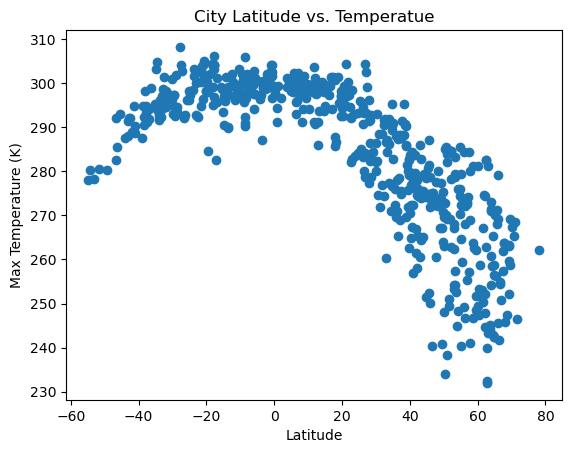

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperatue")
plt.ylabel("Max Temperature (K)") #used the Standard (kelvin) not the Metric (C/F) measurement on the pull from the API
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

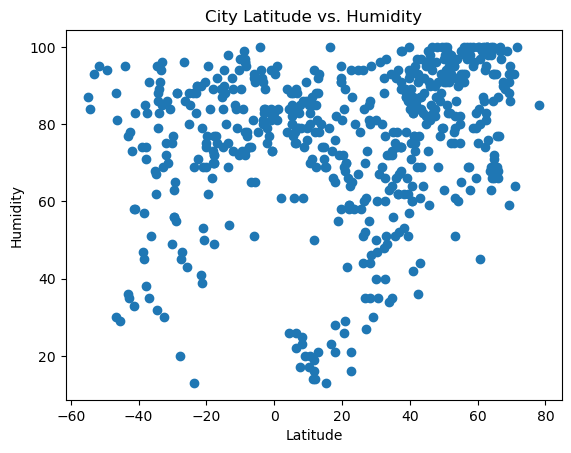

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

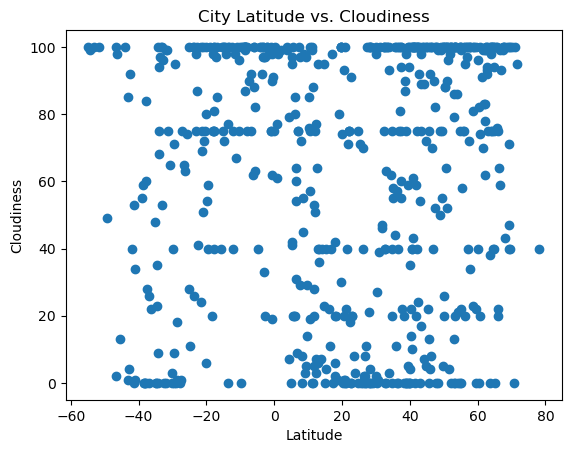

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

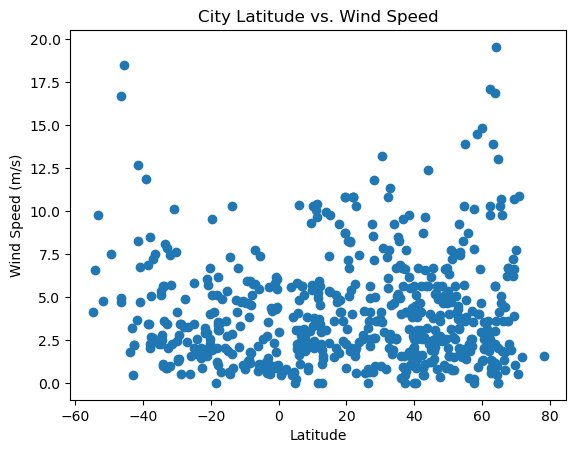

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value) # Perform a linear regression
#regress_values = x_value * slope + intercept # equation of line to calculate predicted y value [y = mx + b]

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lata,40.1629,-8.3327,283.66,84,35,1.65,PT,1706913702
3,yellowknife,62.4560,-114.3525,262.75,95,100,2.57,CA,1706913702
4,hammerfest,70.6634,23.6821,265.40,93,0,0.51,NO,1706913702
5,ivdel',60.6911,60.4206,258.81,97,100,2.00,RU,1706913702
6,jamestown,42.0970,-79.2353,274.55,97,100,4.12,US,1706913890


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,294.12,95,23,2.79,ZA,1706913570
1,waitangi,-43.9535,-176.5597,287.49,95,100,1.79,NZ,1706913701
7,edinburgh of the seven seas,-37.0676,-12.3116,291.73,91,26,7.20,SH,1706914163
10,invercargill,-46.4000,168.3500,285.38,81,98,4.92,NZ,1706913703
11,port-aux-francais,-49.3500,70.2167,280.27,94,49,7.48,TF,1706913703


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6770700278461608


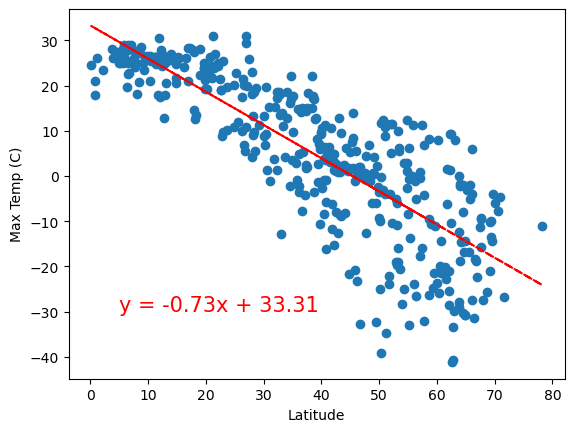

In [65]:
# Linear regression on Northern Hemisphere
x_value= northern_hemi_df['Lat']
y_value= northern_hemi_df['Max Temp'] -273.15 # C= k-273.15
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value) # Perform a linear regression
regress_values = x_value * slope + intercept # equation of line to calculate predicted y value [y = mx + b]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Labels the equation on the chart
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values, "r--") #plots the regression line in red with dashes format
plt.annotate(line_eq,(5,-30),fontsize=15,color="red") #mods the line_eq and places it in a specific x and y value
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print(f'The r-value is: {rvalue**2}')
plt.show()

The r-value is: 0.327522909193683


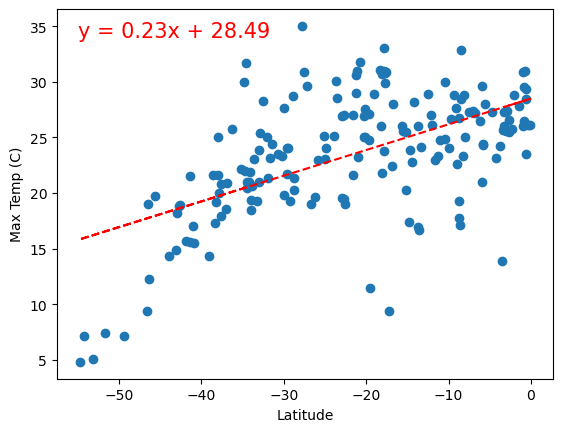

In [66]:
# Linear regression on Southern Hemisphere
x_value= southern_hemi_df['Lat']
y_value= southern_hemi_df['Max Temp'] -273.15 # C= k-273.15
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value) # Perform a linear regression
regress_values = x_value * slope + intercept # equation of line to calculate predicted y value [y = mx + b]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Labels the equation on the chart
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values, "r--") #plots the regression line in red with dashes format
plt.annotate(line_eq,(-55,34),fontsize=15,color="red") #mods the line_eq and places it in a specific x and y value
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print(f'The r-value is: {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** The northern hemisphere has a negative correlation between temp and latitude. The southern hemisphere has a positive correlation between temp and latitude. Makes sense since the closer we get to the equator it gets warmer due to the rotation of the earth against the sun. The cities here do not seem to have a very strong correlation but they still have a correlation with the relationship between latitude and Temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15785606510509204


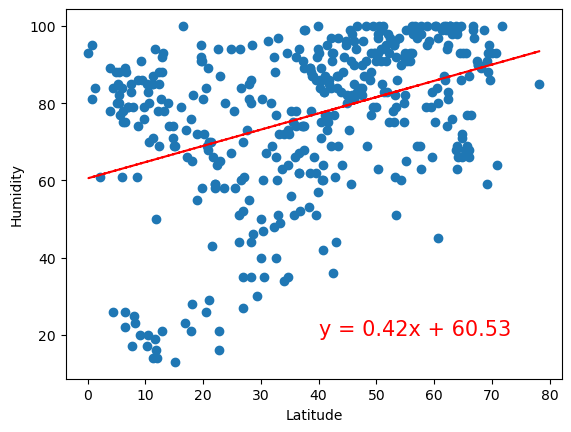

In [49]:
# Northern Hemisphere
x_value= northern_hemi_df['Lat']
y_value= northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value) # Perform a linear regression
regress_values = x_value * slope + intercept # equation of line to calculate predicted y value [y = mx + b]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Labels the equation on the chart
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values, "r--") #plots the regression line in red with dashes format
plt.annotate(line_eq,(40,20),fontsize=15,color="red") #mods the line_eq and places it in a specific x and y value
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is: {rvalue**2}')
plt.show()

The r-value is: 0.0799799998116556


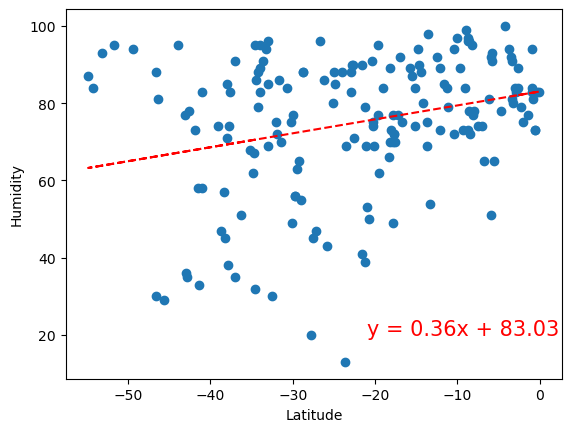

In [52]:
# Southern Hemisphere
x_value= southern_hemi_df['Lat']
y_value= southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value) # Perform a linear regression
regress_values = x_value * slope + intercept # equation of line to calculate predicted y value [y = mx + b]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Labels the equation on the chart
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values, "r--") #plots the regression line in red with dashes format
plt.annotate(line_eq,(-21,20),fontsize=15,color="red") #mods the line_eq and places it in a specific x and y value
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is: {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** Both northern and southern hemisphere cities have no correlations between latitude and humidity. Although the overall relationship may be weak for the dataframes we have, it still does not completely eliminate the possibility of correlation between a couple of the cities in the data. We would need to dig deeper to explain the relationship in those cities. May be possible that the geographical location has a big impact on the correlation in cerain areas of the earth.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06110940460885464


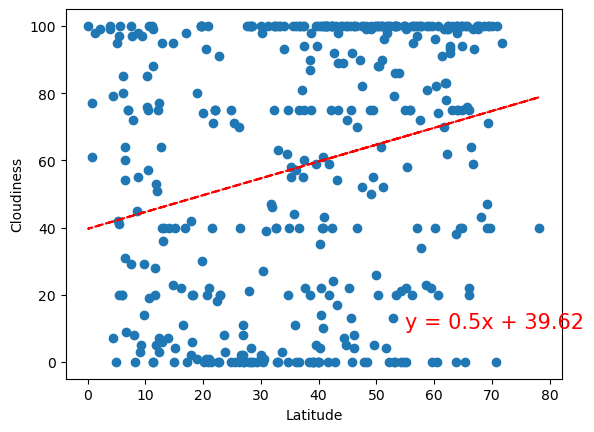

In [57]:
# Northern Hemisphere
x_value= northern_hemi_df['Lat']
y_value= northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value) # Perform a linear regression
regress_values = x_value * slope + intercept # equation of line to calculate predicted y value [y = mx + b]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Labels the equation on the chart
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values, "r--") #plots the regression line in red with dashes format
plt.annotate(line_eq,(55,10),fontsize=15,color="red") #mods the line_eq and places it in a specific x and y value
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is: {rvalue**2}')
plt.show()

The r-value is: 0.14664388766554698


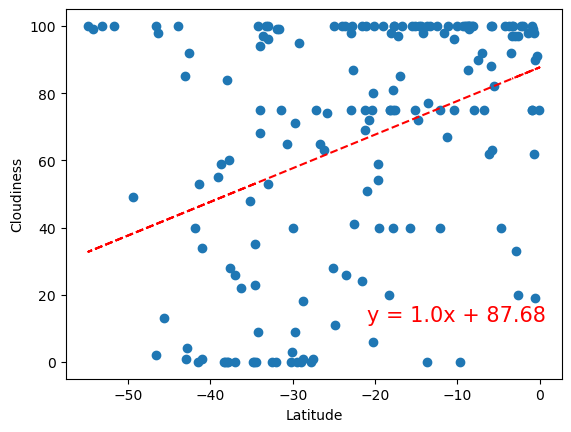

In [60]:
# Southern Hemisphere
x_value= southern_hemi_df['Lat']
y_value= southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value) # Perform a linear regression
regress_values = x_value * slope + intercept # equation of line to calculate predicted y value [y = mx + b]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Labels the equation on the chart
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values, "r--") #plots the regression line in red with dashes format
plt.annotate(line_eq,(-21,12),fontsize=15,color="red") #mods the line_eq and places it in a specific x and y value
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is: {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** Latitude and cloudiness has no correlation in both Northern and southern hemisphere data. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0033670566721088584


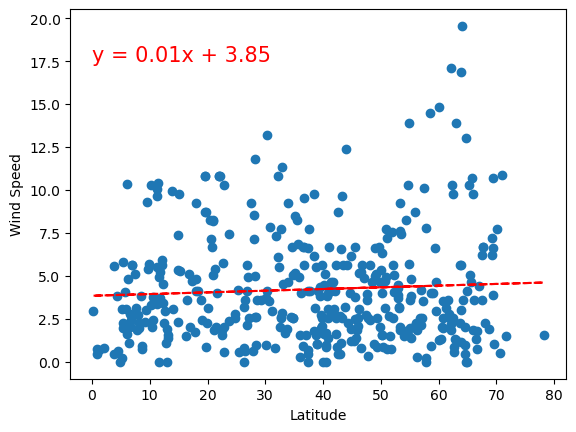

In [63]:
# Northern Hemisphere
x_value= northern_hemi_df['Lat']
y_value= northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value) # Perform a linear regression
regress_values = x_value * slope + intercept # equation of line to calculate predicted y value [y = mx + b]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Labels the equation on the chart
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values, "r--") #plots the regression line in red with dashes format
plt.annotate(line_eq,(0,17.5),fontsize=15,color="red") #mods the line_eq and places it in a specific x and y value
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-value is: {rvalue**2}')
plt.show()

The r-value is: 0.08322225376524582


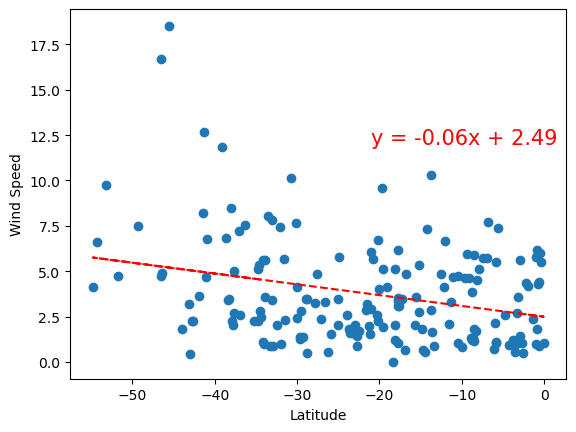

In [64]:
# Southern Hemisphere
x_value= southern_hemi_df['Lat']
y_value= southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value) # Perform a linear regression
regress_values = x_value * slope + intercept # equation of line to calculate predicted y value [y = mx + b]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Labels the equation on the chart
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values, "r--") #plots the regression line in red with dashes format
plt.annotate(line_eq,(-21,12),fontsize=15,color="red") #mods the line_eq and places it in a specific x and y value
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-value is: {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** Wind speed and latitude have almost no correlation. The wind speed increases as you move away from 0 latitude on both directions, but not a drastic change at all that someone would notice.